In [132]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()


In [133]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info


In [134]:
bc.target[0]

np.int64(0)

In [135]:
bc.target[500]

np.int64(1)

In [136]:
bc.target.shape

(569,)

In [137]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [138]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [139]:
bc.data.shape

(569, 30)

# Preprocessing

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [141]:
print(f"Feature=> train:{X_train.shape} - test:{X_test.shape} ")
print(f"Feature=> train:{Y_train.shape} - test:{Y_test.shape} ")

Feature=> train:(455, 30) - test:(114, 30) 
Feature=> train:(455,) - test:(114,) 


# Normalize

In [142]:
X_train[0]

array([1.866e+01, 1.712e+01, 1.214e+02, 1.077e+03, 1.054e-01, 1.100e-01,
       1.457e-01, 8.665e-02, 1.966e-01, 6.213e-02, 7.128e-01, 1.581e+00,
       4.895e+00, 9.047e+01, 8.102e-03, 2.101e-02, 3.342e-02, 1.601e-02,
       2.045e-02, 4.570e-03, 2.225e+01, 2.490e+01, 1.454e+02, 1.549e+03,
       1.503e-01, 2.291e-01, 3.272e-01, 1.674e-01, 2.894e-01, 8.456e-02])

In [143]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [144]:
X_train[0]

array([0.53719575, 0.23321799, 0.52126142, 0.38899854, 0.40598116,
       0.30059731, 0.34169794, 0.4696477 , 0.45757576, 0.25631845,
       0.21774398, 0.26949524, 0.19497715, 0.15560067, 0.21718734,
       0.13594888, 0.21771987, 0.39144254, 0.24286929, 0.16731921,
       0.49601637, 0.33495277, 0.46215241, 0.32885073, 0.52255167,
       0.19579707, 0.27965812, 0.57525773, 0.26197516, 0.19362456])

# 1. Classification

In [145]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred= y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred= y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train: {acc_train} - acc test:{acc_test} - precision: {p} - recall:{r}")

    return acc_train, acc_test, p ,r

### 2. Naive bayes

In [146]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
 

GaussianNB()

In [147]:
Y_pred_train = gnb.predict(X_train)
Y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 0.9296703296703297 - acc test:0.9210526315789473 - precision: 0.9583333333333334 - recall:0.92


In [148]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [149]:
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 0.9648351648351648 - acc test:0.9912280701754386 - precision: 1.0 - recall:0.9866666666666667


## 3. Decision tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion="gini")
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=64)

In [151]:
Y_pred_train = dt.predict(X_train)
Y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 1.0 - acc test:0.9298245614035088 - precision: 1.0 - recall:0.8933333333333333


## 4. Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split= 2)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=32, n_estimators=1000)

In [153]:
Y_pred_train = rf.predict(X_train)
Y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf,r_rf = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 1.0 - acc test:0.9649122807017544 - precision: 1.0 - recall:0.9466666666666667


# 5. SVM

In [154]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train,Y_train)


SVC(kernel='poly')

In [155]:
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm,r_svm = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 0.9868131868131869 - acc test:0.9736842105263158 - precision: 1.0 - recall:0.96


## 6. Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [157]:
Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 0.967032967032967 - acc test:1.0 - precision: 1.0 - recall:1.0


# 7. ANN

In [158]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, Y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [159]:
Y_pred_train = ann.predict(X_train)
Y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(Y_train, Y_test, Y_pred_train, Y_pred_test)

acc train: 0.9802197802197802 - acc test:1.0 - precision: 1.0 - recall:1.0


## Comparison

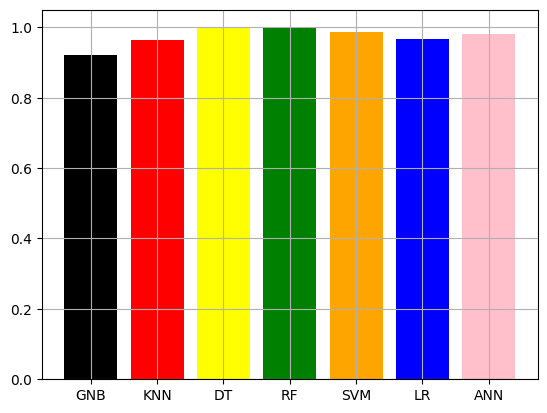

In [160]:
import matplotlib.pyplot as plt
acc_train = [acc_test_gnb,acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann ]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors= ['black','red','yellow','green','orange','blue','pink']
plt.bar(title, acc_train, color=colors)

plt.grid()
plt.show()



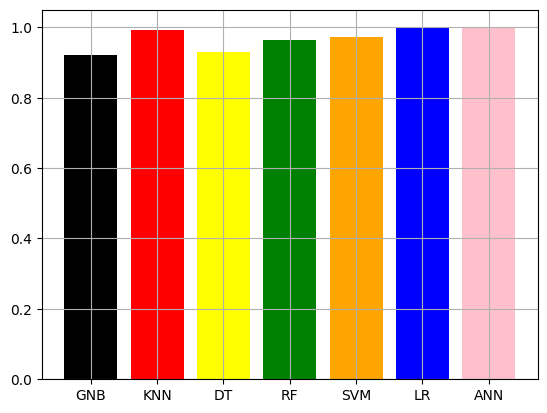

In [161]:
acc_test = [acc_test_gnb,acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann ]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors= ['black','red','yellow','green','orange','blue','pink']
plt.bar(title, acc_test, color=colors)

plt.grid()
plt.show()

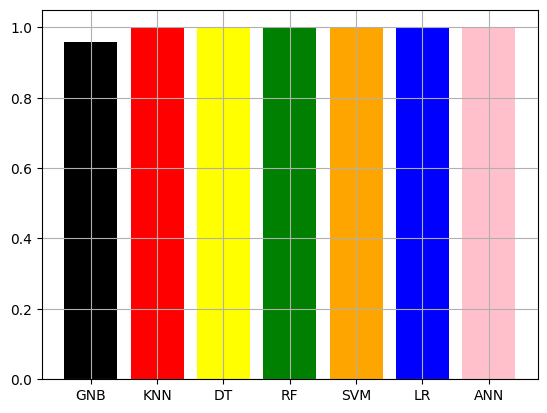

In [162]:
p = [p_gnb,p_knn, p_dt, p_rf, p_svm, p_lr, p_ann ]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors= ['black','red','yellow','green','orange','blue','pink']
plt.bar(title, p, color=colors)

plt.grid()
plt.show()

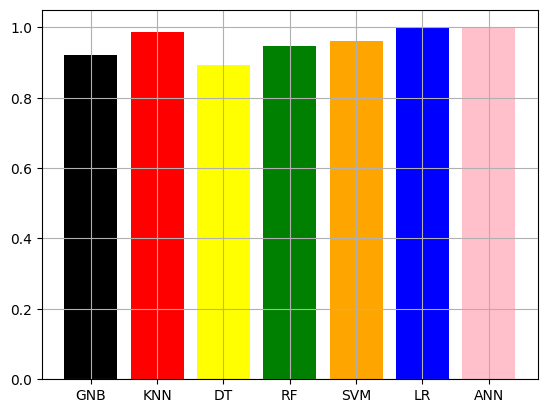

In [163]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann ]
title = ["GNB","KNN","DT","RF","SVM","LR","ANN"]
colors= ['black','red','yellow','green','orange','blue','pink']
plt.bar(title,r , color=colors)

plt.grid()
plt.show()